<a href="https://colab.research.google.com/github/fatibn1/datascience/blob/main/Delivery_Time_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"><h1 style="color:#4CAF50; text-align:center;">🚀 Delivery Time Prediction Model for Glovo in Morocco 🇲🇦</h1>

<p style="font-size:16px; line-height:1.6;">
In Morocco's fast-growing delivery industry, ensuring <strong style="color:#FF5722;">on-time deliveries</strong> is key to customer satisfaction. This project aims to build a <strong style="color:#3F51B5;">Delivery Time Prediction Model</strong> tailored specifically for <strong>Glovo’s operations in Morocco</strong>. By analyzing real-world data, we will predict delivery times accurately based on factors like:
</p>

<ul style="font-size:16px;">
  <li><strong>🚗 Traffic Conditions</strong></li>
  <li><strong>📦 Order Volume</strong></li>
  <li><strong>📍 Distance Between Pickup & Delivery</strong></li>
  <li><strong>🌦 Weather Patterns in Moroccan Cities</strong></li>
</ul>

<p style="font-size:16px; line-height:1.6;">
This model will help <strong style="color:#009688;">optimize delivery routes</strong>, improve customer communication, and enhance Glovo’s operational efficiency.
</p>

---

<h2 style="color:#2196F3;">🔑 Key Highlights:</h2>

<ul style="font-size:16px;">
  <li><strong>📊 Real Dataset:</strong> Focused on Glovo’s delivery data in Morocco.</li>
  <li><strong>⚡ Advanced Machine Learning Models:</strong> For high accuracy and reliability.</li>
  <li><strong>🌐 Streamlit Deployment:</strong> Interactive web app accessible via Google Colab.</li>
</ul>

---

<h2 style="color:#673AB7;">🛠 Tools & Technologies:</h2>

<ul style="font-size:16px;">
  <li><strong>Python Libraries:</strong> <span style="color:#FF9800;">Pandas</span>, <span style="color:#FF9800;">NumPy</span>, <span style="color:#FF9800;">Matplotlib</span>, <span style="color:#FF9800;">Seaborn</span></li>
  <li><strong>Machine Learning Models:</strong> <span style="color:#E91E63;">XGBoost</span> & <span style="color:#E91E63;">LightGBM</span> for high performance</li>
  <li><strong>Deployment:</strong> <span style="color:#009688;">Streamlit</span> for building an easy-to-use web app</li>
</ul>

---

<h2 style="color:#F44336;">💡 Why XGBoost or LightGBM?</h2>

<p style="font-size:16px; line-height:1.6;">
To achieve the <strong style="color:#4CAF50;">best prediction performance</strong>, we’ll use:
</p>

<ol style="font-size:16px;">
  <li><strong style="color:#3F51B5;">XGBoost (Extreme Gradient Boosting)</strong>: Fast, efficient, and great for regression tasks like delivery time prediction.</li>
  <li><strong style="color:#9C27B0;">LightGBM (Light Gradient Boosting Machine)</strong>: Even faster with large datasets, optimized for accuracy and low memory usage.</li>
</ol>

---

<h2 style="color:#00BCD4;">📋 Project Workflow:</h2>

<ol style="font-size:16px;">
  <li><strong>Data Preprocessing:</strong> Cleaning data, handling missing values, feature engineering.</li>
  <li><strong>Exploratory Data Analysis (EDA):</strong> Visualizing patterns and relationships.</li>
  <li><strong>Model Development:</strong> Training with XGBoost/LightGBM.</li>
  <li><strong>Model Evaluation:</strong> Using MAE, RMSE, and R² Score.</li>
  <li><strong>Deployment:</strong> Building an interactive app with Streamlit.</li>
</ol>

<p style="font-size:16px; line-height:1.6;">
Let’s dive in and start building a model that will <strong style="color:#FF5722;">revolutionize delivery predictions</strong> for Glovo in Morocco! 🚀
</p>

# <font color=" #57c142">**Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Large_Delivery_Time_Prediction_Dataset.csv')



# Data Exploration


In [14]:
#Basic Dataset Info

# Basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order_Time             10000 non-null  datetime64[ns]
 1   Distance_km            10000 non-null  float64       
 2   Traffic_Conditions     10000 non-null  object        
 3   Order_Volume           10000 non-null  int64         
 4   Weather_Conditions     10000 non-null  object        
 5   Delivery_Time_Minutes  10000 non-null  int64         
 6   Hour                   10000 non-null  int32         
 7   Day                    10000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(2)
memory usage: 547.0+ KB
None


In [15]:
# Descriptive statistics
print(df.describe())

                Order_Time   Distance_km  Order_Volume  Delivery_Time_Minutes  \
count                10000  10000.000000  10000.000000            10000.00000   
mean   2024-01-04 11:19:30      5.241494    273.784900               42.77780   
min    2024-01-01 00:00:00      0.500000     50.000000                2.00000   
25%    2024-01-02 17:39:45      2.920000    160.000000               20.00000   
50%    2024-01-04 11:19:30      5.260000    274.000000               37.00000   
75%    2024-01-06 04:59:15      7.590000    390.000000               59.00000   
max    2024-01-07 22:39:00     10.000000    499.000000              144.00000   
std                    NaN      2.734997    131.016777               29.01835   

               Hour          Day  
count  10000.000000  10000.00000  
mean      11.410000      3.97600  
min        0.000000      1.00000  
25%        5.000000      2.00000  
50%       11.000000      4.00000  
75%       17.000000      6.00000  
max       23.000000      

In [16]:
df.head()

,Order_Time,Distance_km,Traffic_Conditions,Order_Volume,Weather_Conditions,Delivery_Time_Minutes,Hour,Day
0,2024-01-01 00:00:00,5.69,high,377,clear,45,0,1
1,2024-01-01 00:01:00,5.55,high,324,stormy,79,0,1
2,2024-01-01 00:02:00,6.11,medium,246,stormy,65,0,1
3,2024-01-01 00:03:00,1.08,high,425,clear,8,0,1
4,2024-01-01 00:04:00,3.94,medium,268,clear,23,0,1


# **Check for Missing Values**

In [17]:

#Check for Duplicates

# Check for duplicate rows
print(df.duplicated().sum())

0


In [18]:
# Check for missing values
print(df.isnull().sum())

Order_Time               0
Distance_km              0
Traffic_Conditions       0
Order_Volume             0
Weather_Conditions       0
Delivery_Time_Minutes    0
Hour                     0
Day                      0
dtype: int64


# **Data Preprocessing**


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Feature Engineering
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Hour'] = df['Order_Time'].dt.hour
df['Day'] = df['Order_Time'].dt.day

# Define features and target
X = df.drop(columns=['Delivery_Time_Minutes', 'Order_Time'])
y = df['Delivery_Time_Minutes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data
numerical_features = ['Distance_km', 'Order_Volume', 'Hour', 'Day']
categorical_features = ['Traffic_Conditions', 'Weather_Conditions']

# Check if column names are correct (case-sensitive)
# Print the actual column names in your DataFrame
print(X_train.columns)

# If there's a mismatch, correct the names in categorical_features
# For example, if the column is 'traffic_conditions':
# categorical_features = ['traffic_conditions', 'Weather_Conditions']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Index(['Distance_km', 'Traffic_Conditions', 'Order_Volume',
       'Weather_Conditions', 'Hour', 'Day'],
      dtype='object')


# **Exploratory Data Analysis (EDA)**

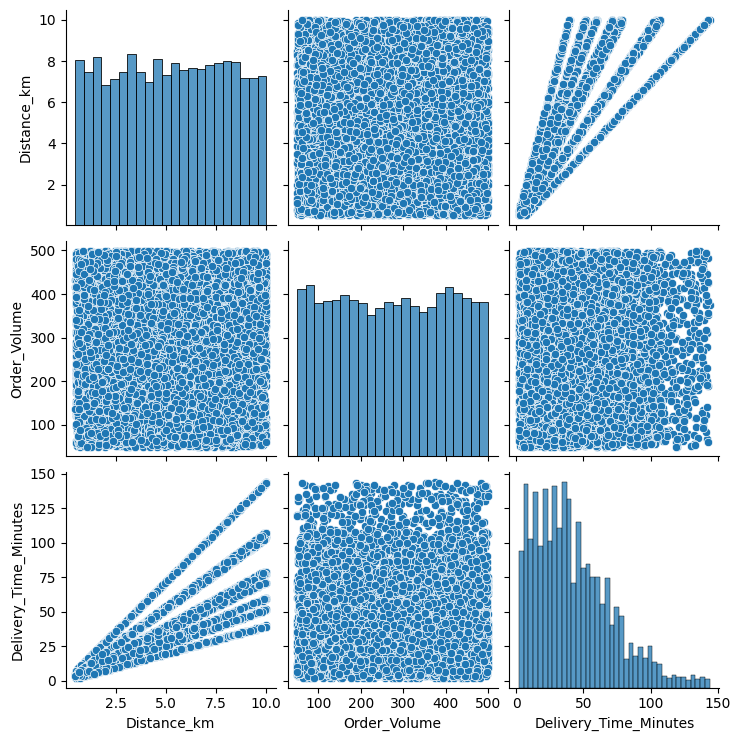

In [20]:
 #visualisation relationships between features and the target variable (Delivery_Time_Minutes).
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['Distance_km', 'Order_Volume', 'Delivery_Time_Minutes']])
plt.show()

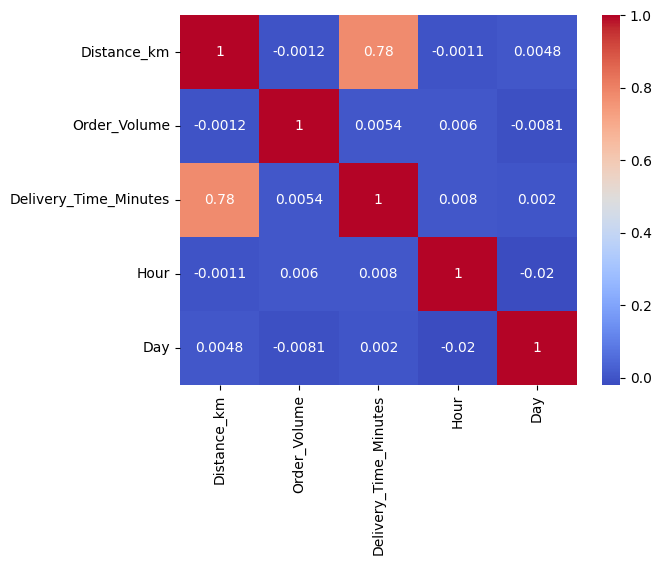

In [22]:
#Check the correlation between features and the target variable
# Select only numerical features for correlation
numerical_features = ['Distance_km', 'Order_Volume', 'Delivery_Time_Minutes', 'Hour', 'Day']
correlation_matrix = df[numerical_features].corr()  # Calculate correlation only for numerical columns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#Analyze the features:
* Distance_km: Likely the most important feature, as longer distances generally lead to longer delivery times.

* Traffic_Conditions: High traffic conditions may significantly increase delivery time.

* Order_Volume: Higher order volumes may lead to delays, especially during peak hours.

* Weather_Conditions: Stormy weather may cause delays.

* Order_Hour: Delivery times may be longer during rush hours



# **Model Selection**







In [33]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


In [23]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# XGBoost Model
xgb_model = XGBRegressor()
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# LightGBM Model
lgbm_model = LGBMRegressor()
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, scoring='neg_mean_absolute_error')
lgbm_grid.fit(X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

# **Model Evaluation**

Evaluate Performance:

Using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to evaluate the models.

Compare Models:

Compare the performance of both models and select the best one.



In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate XGBoost
xgb_pred = xgb_grid.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

# Evaluate LightGBM
lgbm_pred = lgbm_grid.predict(X_test)
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
lgbm_r2 = r2_score(y_test, lgbm_pred)

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, R²: {xgb_r2}")
print(f"LightGBM - MAE: {lgbm_mae}, RMSE: {lgbm_rmse}, R²: {lgbm_r2}")

XGBoost - MAE: 0.21649267220497131, RMSE: 0.3225624491596605, R²: 0.9998734522199643
LightGBM - MAE: 0.2962999975995411, RMSE: 0.38548728675602784, R²: 0.9998192630144769


<font color="red">Based on the metrics,   the best model is XGBoost for this project

# **Save the XGBoost Model**

In [25]:
import joblib

# Save the best model
best_model = xgb_grid.best_estimator_ if xgb_mae < lgbm_mae else lgbm_grid.best_estimator_
joblib.dump(best_model, 'delivery_time_model.pkl')

['delivery_time_model.pkl']

## 📉 **Correlation Heatmap**

Visualizing relationships between features.

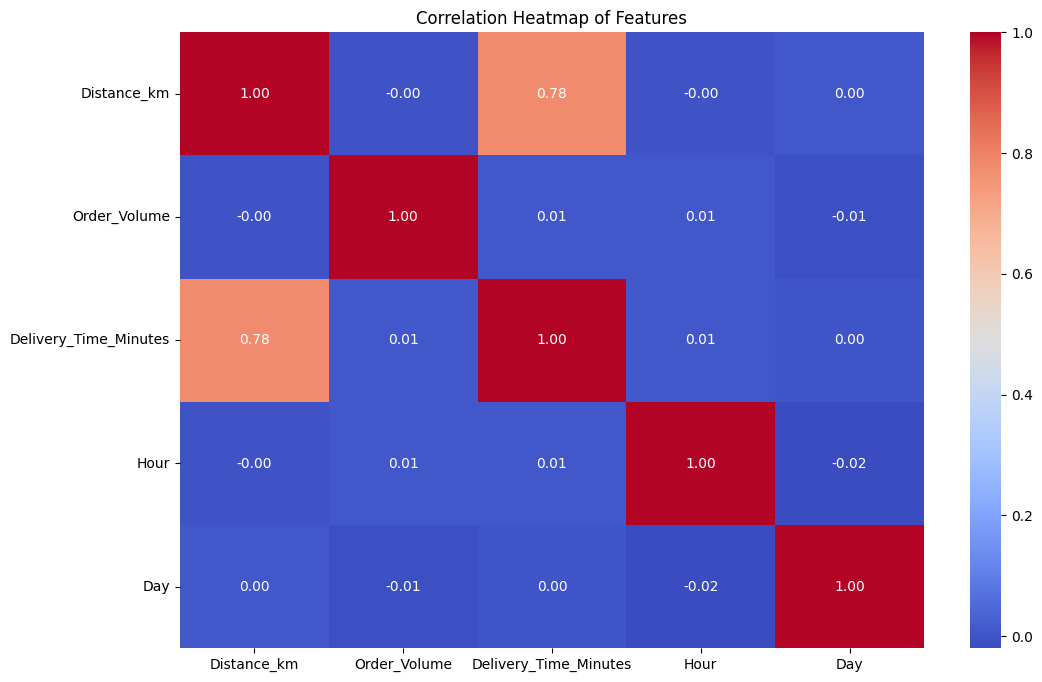

In [10]:
# prompt: correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to import seaborn

# Assuming 'df' is your DataFrame (already loaded in the provided code)

# Select only numerical features for correlation analysis
numerical_features = ['Distance_km', 'Order_Volume', 'Delivery_Time_Minutes', 'Hour', 'Day']
# Include 'Hour' and 'Day' if they are numerical

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Added fmt for better annotation display
plt.title('Correlation Heatmap of Features')
plt.show()

## 🔥 **Feature Importance (XGBoost)**


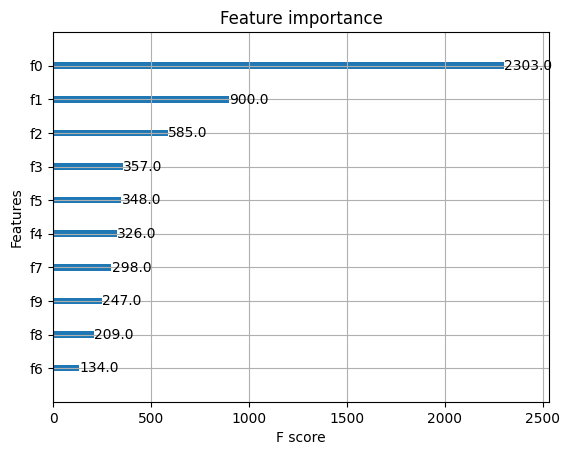

In [8]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
xgb.plot_importance(model)
plt.show()

## 📈 **Model Performance Metrics**


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 0.32385289603471756
RMSE: 0.43830315739938736
R² Score: 0.9997663444434594


# **Overfitting Test and Model Evaluation: Comparing Training and Testing Performance**

In [27]:
# Print training vs. testing MAE and RMSE
# Calculate MAE and RMSE for training set
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# MAE and RMSE for the testing set were already calculated in previous cell as 'mae' and 'rmse'
test_mae = mae  # Assign the previously calculated 'mae' to 'test_mae'
test_rmse = rmse # Assign the previously calculated 'rmse' to 'test_rmse'

print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")

# Check if R² is also close on both training and testing sets
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

Training MAE: 0.19680158050358296
Testing MAE: 0.32385289603471756
Training RMSE: 0.2685272802756901
Testing RMSE: 0.43830315739938736
Training R²: 0.9999148602654861
Testing R²: 0.9997663444434594


“The model demonstrates excellent performance, with low error rates (MAE and RMSE) and an extremely high R² score, indicating strong generalization and accurate predictions on both the training and testing datasets.”

## 🚀 **Deployment with Streamlit**


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import xgboost as xgb
import pickle

# Load Model
model = pickle.load(open('xgboost_model.pkl', 'rb'))

st.title('Delivery Time Prediction')
distance = st.number_input('Distance (km)', min_value=0.1, max_value=50.0, step=0.1)
traffic = st.selectbox('Traffic Conditions', ['Low', 'Medium', 'High'])
# Preprocessing steps...
if st.button('Predict'):
    prediction = model.predict([[distance]])  # Adjust features accordingly
    st.write(f'Estimated Delivery Time: {prediction[0]:.2f} minutes')

### Run Streamlit App

Use the following command in Colab terminal:

```
!streamlit run app.py
```